In [32]:
import pandas as pd

file_path = '/content/Beach_Water_Quality_-_Automated_Sensors_20240912.csv'
df = pd.read_csv(file_path)

print(df.head())


          Beach Name   Measurement Timestamp  Water Temperature  Turbidity  \
0      Calumet Beach  04/07/2018 12:30:00 AM               21.7       3.15   
1  Ohio Street Beach  06/14/2019 07:00:00 PM               16.0       2.18   
2  Ohio Street Beach  05/16/2018 01:00:00 PM               21.7       1.92   
3  Ohio Street Beach  05/16/2018 02:00:00 PM               21.9       1.81   
4  Ohio Street Beach  06/04/2018 09:00:00 AM               23.0       0.03   

   Transducer Depth  Wave Height  Wave Period  Battery Life  \
0               NaN        0.389          3.0           0.0   
1               NaN        0.137          3.0          11.8   
2               NaN        0.023          1.0          10.3   
3               NaN        0.026          6.0          10.3   
4               NaN        0.021          8.0          12.4   

  Measurement Timestamp Label               Measurement ID  
0         04/07/2018 12:30 AM     CalumetBeach201804072430  
1          06/14/2019 7:00 PM 

In [33]:
print(df.isnull().sum())

df = df.dropna()


Beach Name                         0
Measurement Timestamp              0
Water Temperature                386
Turbidity                        386
Transducer Depth               35593
Wave Height                      613
Wave Period                      613
Battery Life                     386
Measurement Timestamp Label        0
Measurement ID                     0
dtype: int64


In [34]:
def is_safe(row):
    if row['Water Temperature'] > 18 and row['Turbidity'] < 2.5 and row['Wave Height'] < 0.2:
        return 1
    else:
        return 0

df['Is_Safe'] = df.apply(is_safe, axis=1)


<ipython-input-34-0d2f1cb02efb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Is_Safe'] = df.apply(is_safe, axis=1)


In [35]:
from sklearn.preprocessing import StandardScaler

features = ['Water Temperature', 'Turbidity', 'Wave Height', 'Wave Period']

scaler = StandardScaler()

df[features] = scaler.fit_transform(df[features])


<ipython-input-35-60abd574cfa7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features] = scaler.fit_transform(df[features])


In [36]:
from sklearn.model_selection import train_test_split

X = df[['Water Temperature', 'Turbidity', 'Wave Height', 'Wave Period', 'Battery Life']]
y = df['Is_Safe']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 99.95%


In [38]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:21:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [39]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 99.95%


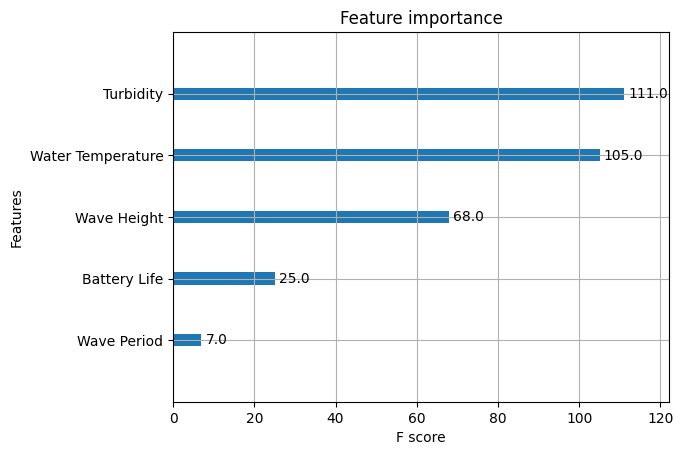

In [40]:
import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.show()

In [44]:
# pridicting for an individeo datapoint:

custom_data = pd.DataFrame([[17.2, 1.48, 1.525, 0.202, 4]],
                           columns=['Water Temperature', 'Turbidity', 'Wave Height', 'Wave Period', 'Battery Life'])

custom_data[features] = scaler.transform(custom_data[features])

prediction = model.predict(custom_data)
# print("Prediction:", prediction)

if prediction[0] == 1:
    print("suitable")
else:
    print("not suitable")


not suitable
